In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import warnings
warnings.filterwarnings('ignore')

In [2]:
churning=pd.read_csv("banking_churn.csv")
churning.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# EDA

In [3]:
churning.shape

(10000, 14)

In [4]:
churning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
churning.duplicated().sum()

0

In [6]:
#No of customers who have churned and those who have not
churning["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [7]:
def report(churning):
    col = []
    d_type = []
    uniques = []
    n_uniques = []
    
    for i in churning.columns:
        col.append(i)
        d_type.append(churning[i].dtypes)
        uniques.append(churning[i].unique()[:5])
        n_uniques.append(churning[i].nunique())
    
    return pd.DataFrame({'Column': col, 'd_type': d_type, 'unique_sample': uniques, 'n_uniques': n_uniques})
report(churning)

,Column,d_type,unique_sample,n_uniques
0,RowNumber,int64,"[1, 2, 3, 4, 5]",10000
1,CustomerId,int64,"[15634602, 15647311, 15619304, 15701354, 15737...",10000
2,Surname,object,"[Hargrave, Hill, Onio, Boni, Mitchell]",2932
3,CreditScore,int64,"[619, 608, 502, 699, 850]",460
4,Geography,object,"[France, Spain, Germany]",3
5,Gender,object,"[Female, Male]",2
6,Age,int64,"[42, 41, 39, 43, 44]",70
7,Tenure,int64,"[2, 1, 8, 7, 4]",11
8,Balance,float64,"[0.0, 83807.86, 159660.8, 125510.82, 113755.78]",6382
9,NumOfProducts,int64,"[1, 3, 2, 4]",4


In [8]:
df=churning.drop(['RowNumber','CustomerId','Surname'], axis=1)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [9]:
class Dummy_Transformer(object):
    
    def fit(self, X, y=None):
        self.keys = set(X)
    
    def transform(self, X, y=None):
        res = {}
        for key in self.keys:
            res[key] = [0]*len(X)    
        for i, item in enumerate(X):
            if item in self.keys:
                res[item][i] = 1
        return pd.DataFrame(res)
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)  
dummytf = Dummy_Transformer()

In [12]:
from sklearn.preprocessing import LabelEncoder
frames = [df,dummytf.fit_transform(df.Geography)]
dfNew=pd.concat(frames,axis=1,join='inner')
dfNew["Gender"] = LabelEncoder().fit_transform(dfNew["Gender"])
# move the column to end of list using index, pop and insert
columns = list(dfNew)
columns.insert(900, columns.pop(columns.index('Exited')))
dfNew = dfNew.loc[:, columns]

dfNum=dfNew.drop('Geography',axis=1)
dfNum

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Spain,Germany,Exited
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0,1
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1,0,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0,1
3,699,0,39,1,0.00,2,0,0,93826.63,1,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,1,0,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,1,0,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,0,0,1
9998,772,1,42,3,75075.31,2,1,0,92888.52,0,0,1,1


<AxesSubplot:>

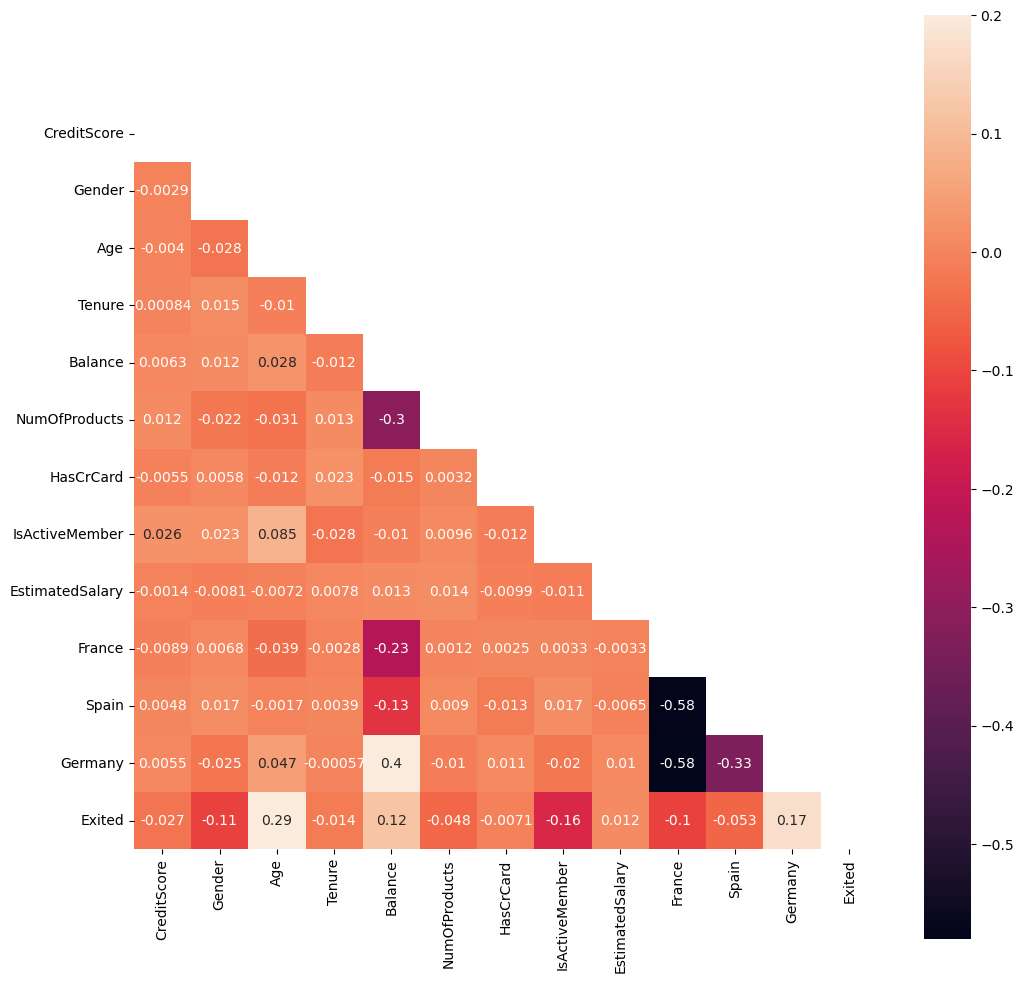

In [13]:
# checking for correlation
train_corr = dfNum.corr(method = 'pearson')
mask = np.zeros_like(train_corr)
mask[np.triu_indices_from(mask)] = True
#>>> with sns.axes_style("white"):
plt.figure(figsize=(12,12))
corrHeat = sns.heatmap(train_corr, mask=mask, annot=True,vmax=.2, square=True)
corrHeat

Churn: 2037
Retention: 7963


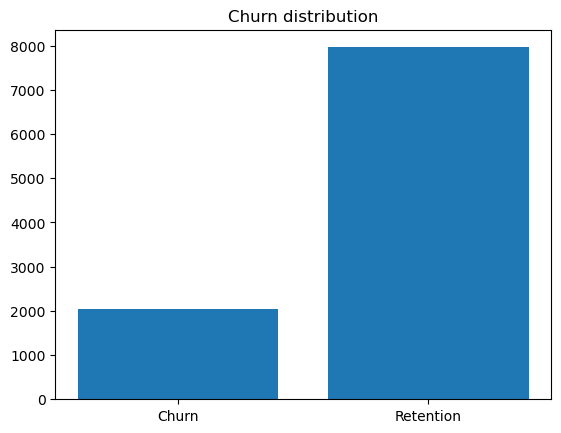

In [14]:
plt.bar(['Churn', 'Retention'], [dfNum['Exited'].sum(), dfNum['Exited'].shape[0]-dfNum['Exited'].sum().sum()])
plt.title('Churn distribution')
print("Churn:",dfNum['Exited'].sum())
print("Retention:",dfNum['Exited'].shape[0]-dfNum['Exited'].sum().sum())

# Churning per country

<AxesSubplot:title={'center':'Countries'}>

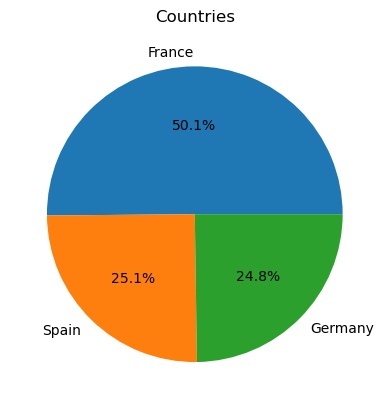

In [15]:
pd.crosstab(index=df.Geography,columns='count',normalize=True).plot(
    kind='pie',autopct='%.1f%%',y='count',
    labels=df.Geography.unique(),
    ylabel='',title='Countries',legend=False)

In [16]:
by_country = df.groupby(['Geography'])['Exited'].value_counts(normalize=True).to_frame().rename(columns={'Exited': 'ratio'}).reset_index().sort_values('Geography')
by_country

,Geography,Exited,ratio
0,France,0,0.838452
1,France,1,0.161548
2,Germany,0,0.675568
3,Germany,1,0.324432
4,Spain,0,0.833266
5,Spain,1,0.166734


[Text(0.5, 1.0, 'Churned Probability with country')]

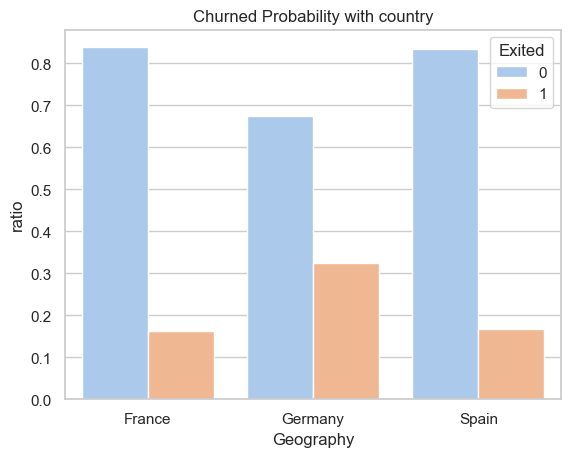

In [18]:
sns.set_theme(style="whitegrid", color_codes=True,context='notebook',palette='pastel')
sns.barplot(x='Geography',y='ratio', hue='Exited', data=by_country).set(title = 'Churned Probability with country')

# Number of people of churned based on gender

In [19]:
by_gender = df.groupby(['Gender'])['Exited'].value_counts(normalize=True).to_frame().rename(columns={'Exited': 'ratio'}).reset_index().sort_values('Gender')
by_gender

,Gender,Exited,ratio
0,Female,0,0.749285
1,Female,1,0.250715
2,Male,0,0.835441
3,Male,1,0.164559


[Text(0.5, 1.0, 'Churned Probability with gender')]

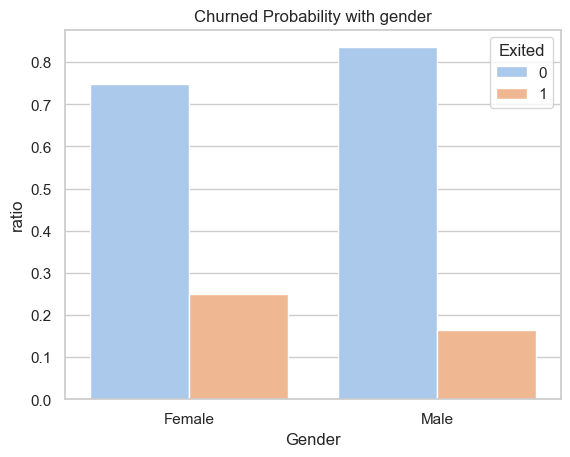

In [20]:
sns.set_theme(style="whitegrid", color_codes=True,context='notebook',palette='pastel')
sns.barplot(x='Gender',y='ratio', hue='Exited', data=by_gender).set(title = 'Churned Probability with gender')

In [22]:
by_gender_country = df.groupby(['Geography', 'Gender'])['Exited'].value_counts(normalize=True).to_frame().rename(columns={'Exited': 'ratio'}).reset_index().sort_values('Geography')
by_gender_country


,Geography,Gender,Exited,ratio
0,France,Female,0,0.796550
1,France,Female,1,0.203450
2,France,Male,0,0.872866
3,France,Male,1,0.127134
4,Germany,Female,0,0.624476
5,Germany,Female,1,0.375524
6,Germany,Male,0,0.721884
7,Germany,Male,1,0.278116
8,Spain,Female,0,0.787879
9,Spain,Female,1,0.212121


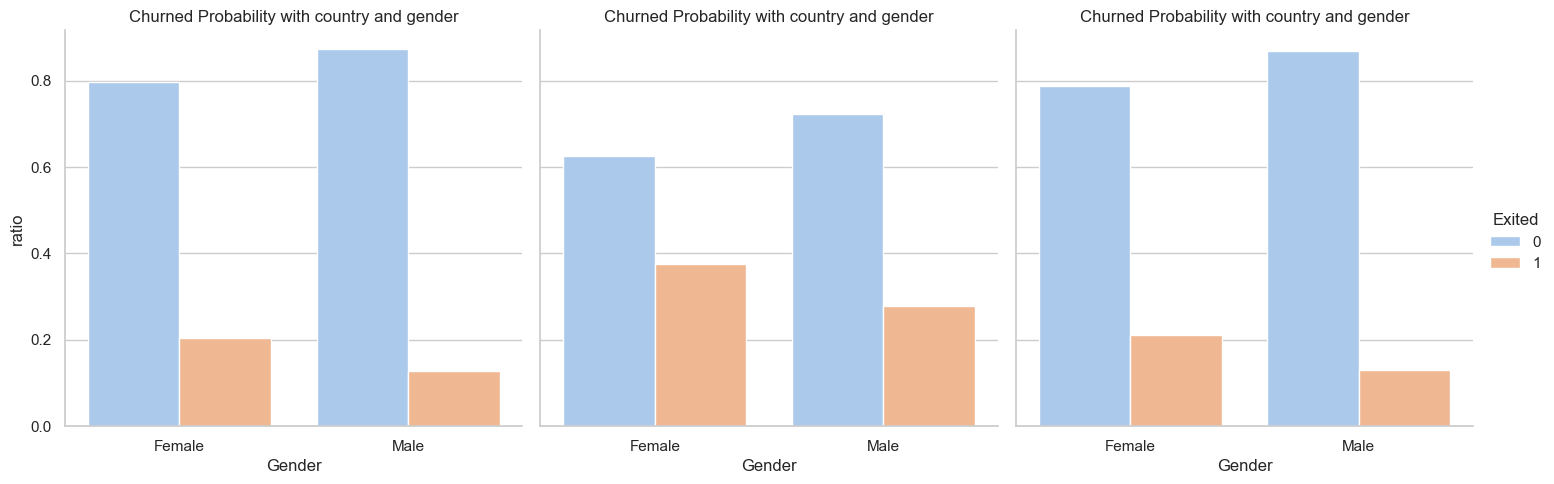

In [24]:
sns.set_theme(style="whitegrid", color_codes=True,context='notebook',palette='pastel')
sns.catplot(x='Gender',y='ratio', hue='Exited', col='Geography', kind='bar', data=by_gender_country).set(title = 'Churned Probability with country and gender')

# CUSTOMER AGE DISTRIBUTION AGAINST CHURN

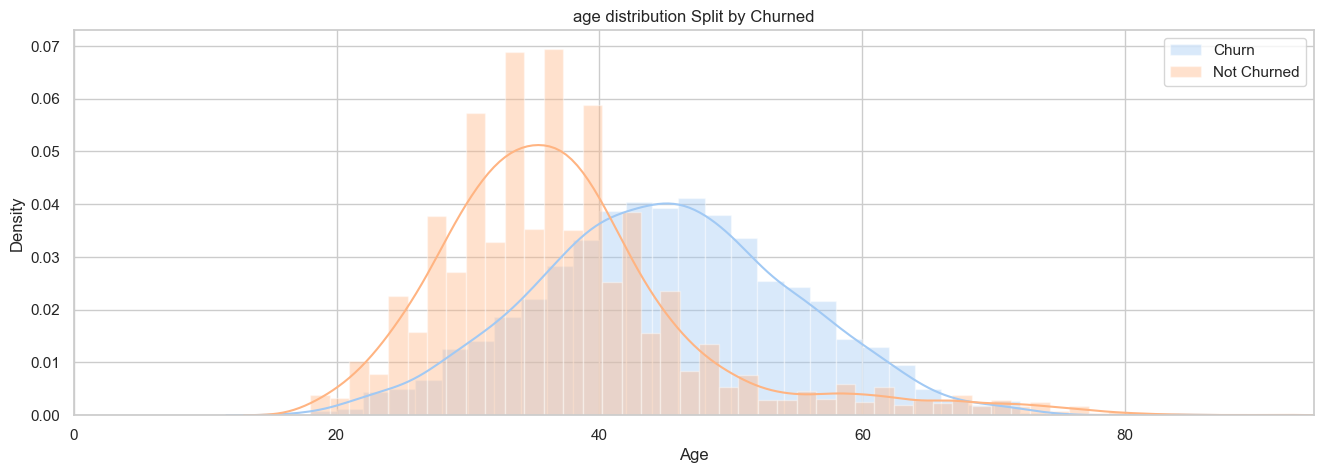

In [25]:
plt.figure(figsize=(16,5))
plt.title('age distribution Split by Churned')
sns.distplot(df[(df['Exited'] == 1)]['Age'], label='Churn').set(xlim=(0))
sns.distplot(df[(df['Exited'] == 0)]['Age'], label='Not Churned').set(xlim=(0))
plt.legend(loc= 'upper right')
plt.show()


In [26]:
by_age = df.groupby(['Age'])['Exited'].value_counts(normalize=True).to_frame().rename(columns={'Exited': 'ratio'}).reset_index().sort_values('Age')
by_age

,Age,Exited,ratio
0,18,0,0.909091
1,18,1,0.090909
2,19,0,0.962963
3,19,1,0.037037
4,20,0,0.950000
...,...,...,...
123,84,0,0.500000
124,84,1,0.500000
125,85,0,1.000000
126,88,0,1.000000


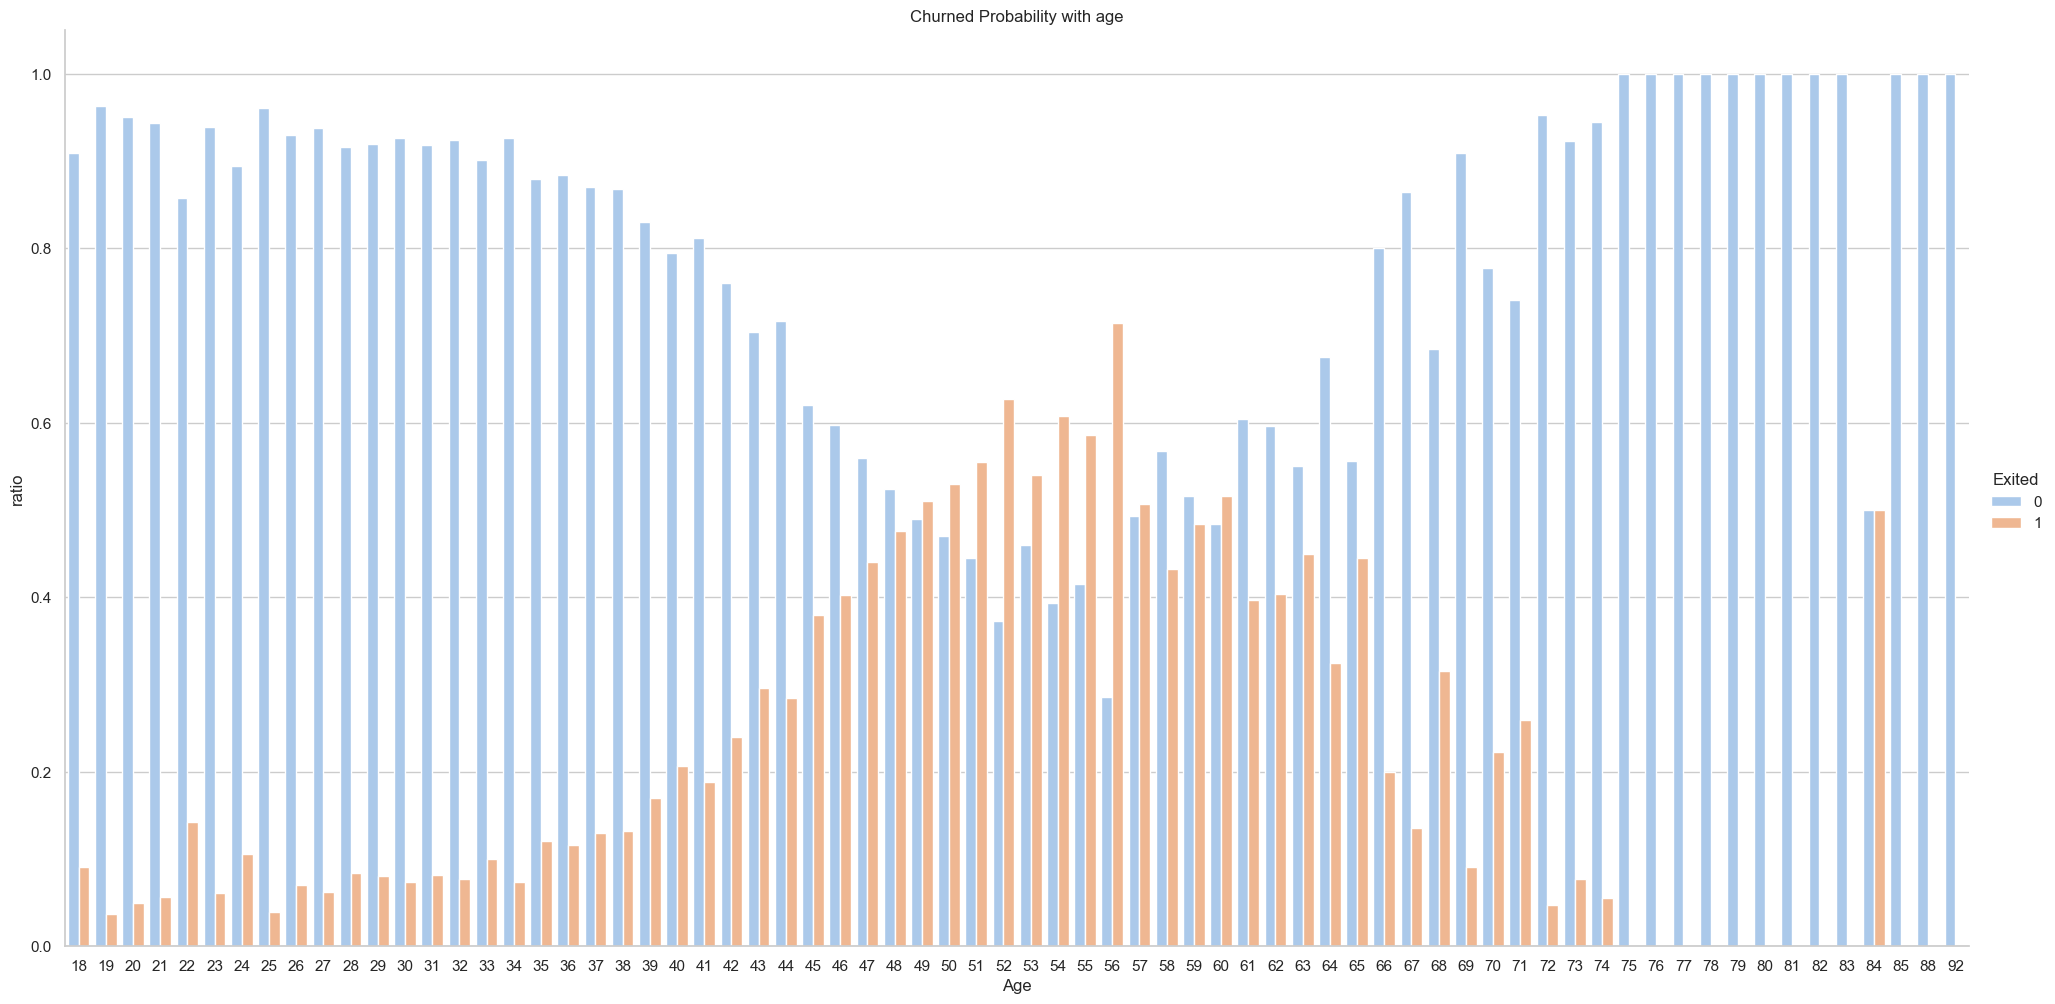

In [28]:
#no  of customer who have churned according to age.
sns.set_theme(style="whitegrid", color_codes=True,context='notebook',palette='pastel')
sns.catplot(x='Age',y='ratio', hue='Exited',  kind='bar', data=by_age,height=10,aspect=2).set(title = 'Churned Probability with age')

        Balance  Exited     ratio
0          0.00       0  0.861764
1          0.00       1  0.138236
2       3768.69       1  1.000000
3      12459.19       1  1.000000
4      14262.80       0  1.000000
...         ...     ...       ...
6379  216109.88       1  1.000000
6380  221532.80       0  1.000000
6381  222267.63       1  1.000000
6382  238387.56       1  1.000000
6383  250898.09       1  1.000000

[6384 rows x 3 columns]


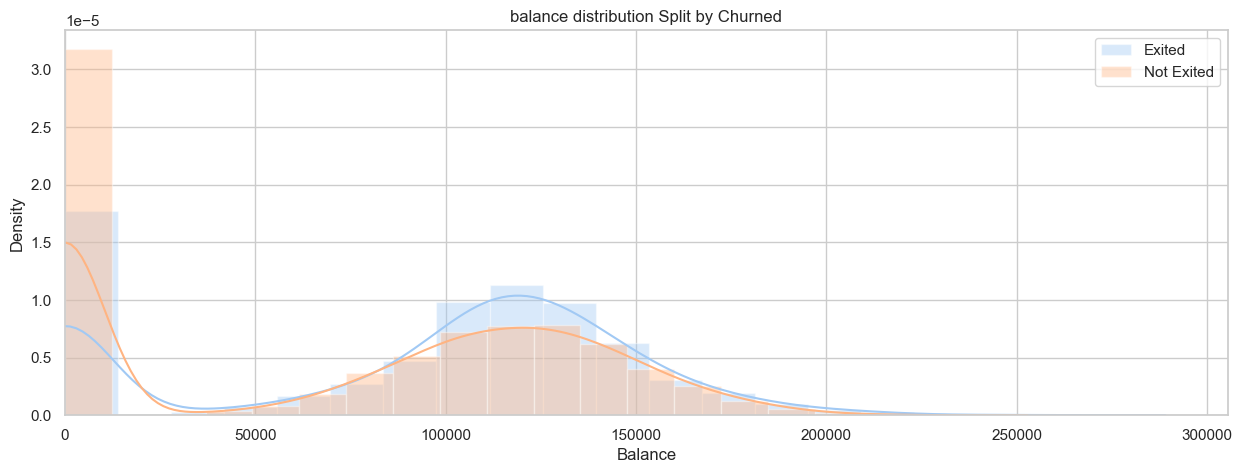

In [29]:
#BALANCE AGAINST CHURN
by_balance = df.groupby(['Balance'])['Exited'].value_counts(normalize=True).to_frame().rename(columns={'Exited': 'ratio'}).reset_index().sort_values('Balance')
print(by_balance)
plt.figure(figsize=(15,5))
plt.title('balance distribution Split by Churned')
sns.distplot(dfNum[(dfNum['Exited'] == 1)]['Balance'], label='Exited').set(xlim=(0))
sns.distplot(dfNum[(dfNum['Exited'] == 0)]['Balance'], label='Not Exited').set(xlim=(0))
plt.legend(loc= 'upper right')
plt.show()

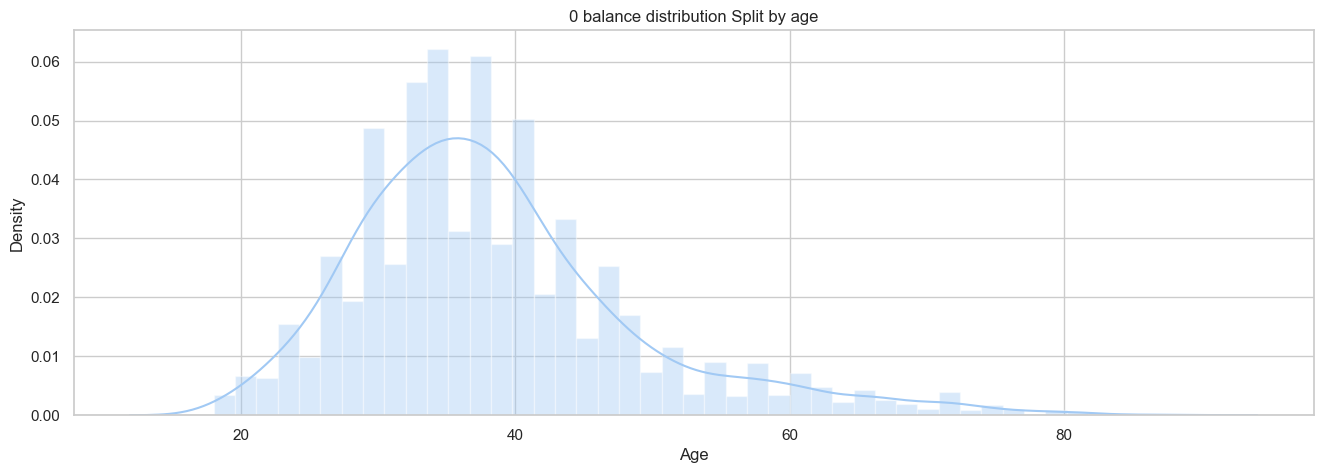

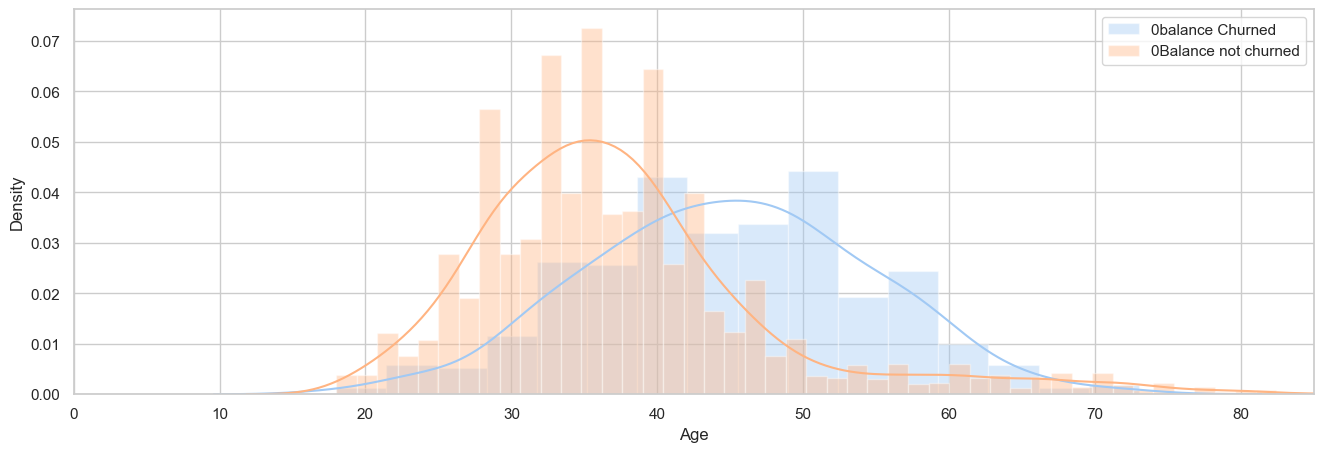

In [31]:
#balance = 0 with age vs churn
plt.figure(figsize=(16,5))
plt.title('0 balance distribution Split by age')
sns.distplot(dfNum[(dfNum['Balance'] == 0)]['Age'], label='0balance with age dist')
plt.show()
plt.figure(figsize=(16,5))
sns.distplot(dfNum[(dfNum['Exited'] == 1)& (dfNum['Balance'] == 0)]['Age'], label='0balance Churned').set(xlim=(0))
sns.distplot(dfNum[(dfNum['Exited'] == 0)& (dfNum['Balance'] == 0)]['Age'], label='0Balance not churned').set(xlim=(0))
plt.legend(loc= 'upper right')
plt.show()


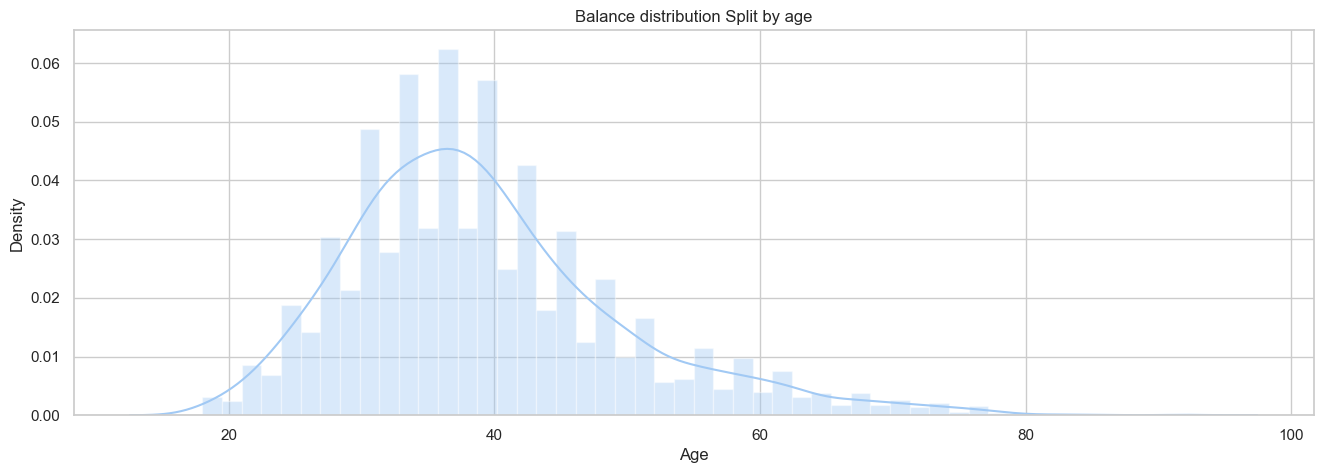

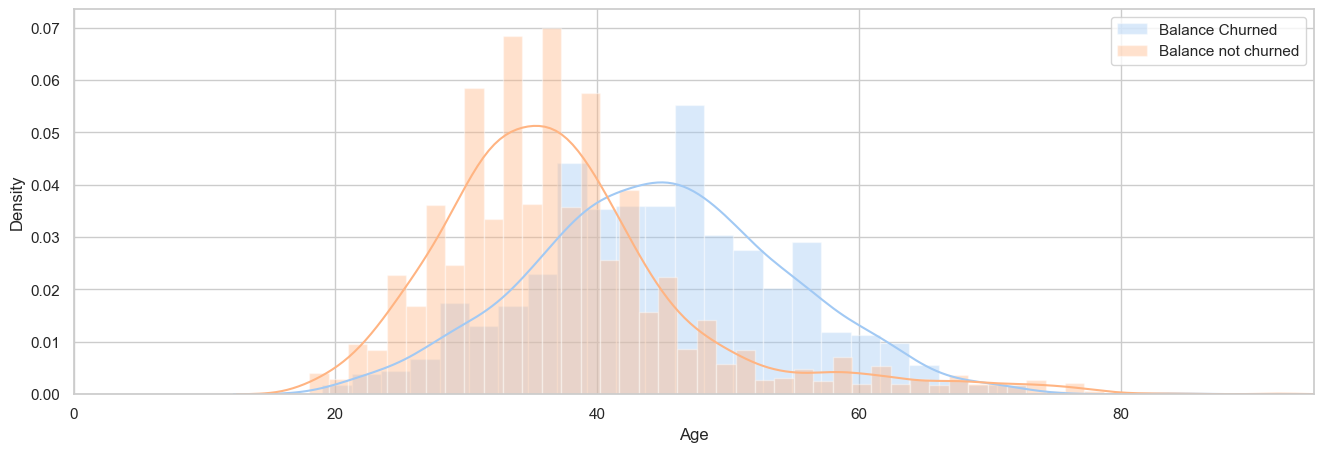

In [33]:
#balance > 0 with age vs churn
plt.figure(figsize=(16,5))
plt.title('Balance distribution Split by age')
sns.distplot(dfNum[(dfNum['Balance'] > 0)]['Age'], label='Balance with age dist')
plt.show()
plt.figure(figsize=(16,5))
sns.distplot(dfNum[(dfNum['Exited'] == 1)& (dfNum['Balance'] > 0)]['Age'], label='Balance Churned').set(xlim=(0))
sns.distplot(dfNum[(dfNum['Exited'] == 0)& (dfNum['Balance'] > 0)]['Age'], label='Balance not churned').set(xlim=(0))
plt.legend(loc= 'upper right')
plt.show()

In [34]:
#ACTIVE MEMBER AGAINST CHURNED
by_active_member = df.groupby(['IsActiveMember'])['Exited'].value_counts(normalize=True).to_frame().rename(columns={'Exited': 'ratio'}).reset_index().sort_values('IsActiveMember')
by_active_member

,IsActiveMember,Exited,ratio
0,0,0,0.731491
1,0,1,0.268509
2,1,0,0.857309
3,1,1,0.142691


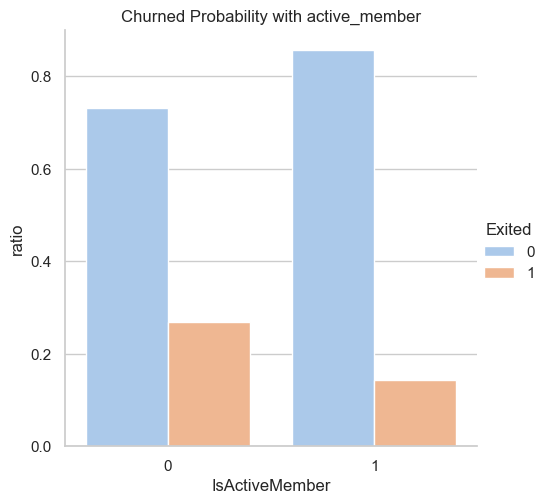

In [35]:
sns.set_theme(style="whitegrid", color_codes=True,context='notebook',palette='pastel')
sns.catplot(x='IsActiveMember',y='ratio', hue='Exited',  kind='bar', data=by_active_member).set(title = 'Churned Probability with active_member')

# splitting the data

In [45]:
from sklearn.model_selection import train_test_split
features = list(dfNum.columns)
target = "Exited"
features.remove(target)

X = dfNum[features]
y = dfNum[target]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
print(X_train.shape)
print(X_test.shape)

(7000, 12)
(3000, 12)


In [46]:
y_train.value_counts()

0    5606
1    1394
Name: Exited, dtype: int64

In [53]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import roc_curve, roc_auc_score,accuracy_score,make_scorer
from sklearn.metrics import recall_score,classification_report,precision_score,confusion_matrix


              precision    recall  f1-score   support

           0       0.87      0.96      0.91      2357
           1       0.78      0.46      0.58       643

    accuracy                           0.86      3000
   macro avg       0.82      0.71      0.75      3000
weighted avg       0.85      0.86      0.84      3000



Text(0.5, 1.0, 'Accuracy Score: 0.8566666666666667')

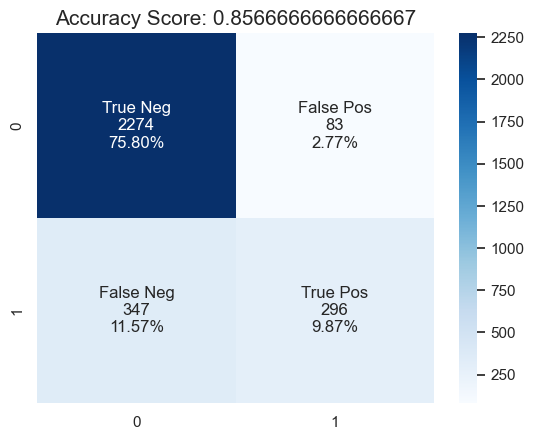

In [54]:
#Random Forest
steps = [('rescale', StandardScaler()),
         ('ranFo', RandomForestClassifier(n_estimators=1000,random_state=20))]
modelRf = Pipeline(steps)
modelRf = modelRf.fit(X_train, y_train)
Rfpred = modelRf.predict(X_test)
print(classification_report(y_test,Rfpred))
cf_matrixRf = confusion_matrix(y_test,Rfpred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrixRf.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrixRf.flatten()/np.sum(cf_matrixRf)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrixRf, annot = labels, fmt = '', cmap = 'Blues')
all_sample_title = 'Accuracy Score: {0}'.format(modelRf.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

              precision    recall  f1-score   support

           0       0.81      0.96      0.88      2357
           1       0.58      0.20      0.30       643

    accuracy                           0.80      3000
   macro avg       0.70      0.58      0.59      3000
weighted avg       0.76      0.80      0.76      3000



Text(0.5, 1.0, 'Accuracy Score: 0.7973333333333333')

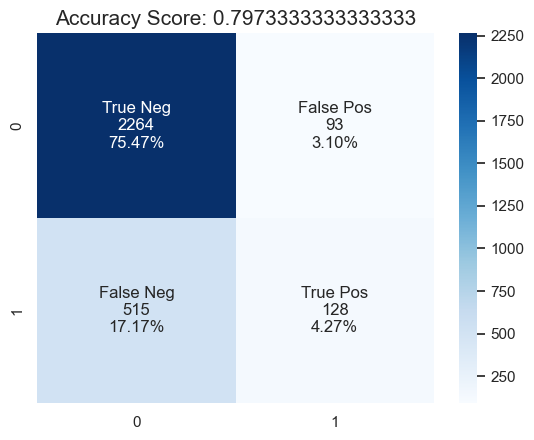

In [55]:
#Logistic regression
steps = [('rescale', StandardScaler()),
         ('logr', LogisticRegression())]
modelLr = Pipeline(steps)
modelLr = modelLr.fit(X_train, y_train)
y_train_pred = modelLr.predict(X_train)
LRpred = modelLr.predict(X_test)
print(classification_report(y_test,LRpred))
cf_matrixLr = confusion_matrix(y_test,LRpred)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrixLr.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrixLr.flatten()/np.sum(cf_matrixLr)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrixLr, annot = labels, fmt = '', cmap = 'Blues')
all_sample_title = 'Accuracy Score: {0}'.format(modelLr.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      2357
           1       0.48      0.46      0.47       643

    accuracy                           0.78      3000
   macro avg       0.67      0.66      0.67      3000
weighted avg       0.77      0.78      0.78      3000



Text(0.5, 1.0, 'Accuracy Score: 0.7786666666666666')

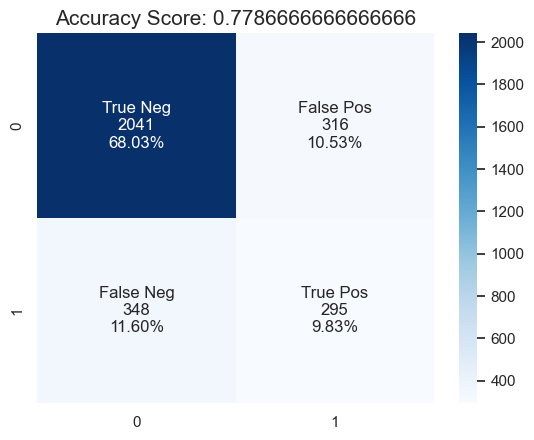

In [56]:
#DecisionTree
steps = [('rescale', StandardScaler()),
         ('dt', DecisionTreeClassifier())]
dtree = Pipeline(steps)
dtree.fit(X_train, y_train)

y_train_pred = dtree.predict(X_train)
DTpred = dtree.predict(X_test)
print(classification_report(y_test,DTpred))
cf_matrixLr = confusion_matrix(y_test,DTpred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrixLr.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrixLr.flatten()/np.sum(cf_matrixLr)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrixLr, annot = labels, fmt = '', cmap = 'Blues')
all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

              precision    recall  f1-score   support

           0       0.87      0.97      0.91      2357
           1       0.79      0.45      0.57       643

    accuracy                           0.86      3000
   macro avg       0.83      0.71      0.74      3000
weighted avg       0.85      0.86      0.84      3000



Text(0.5, 1.0, 'Accuracy Score: 0.856')

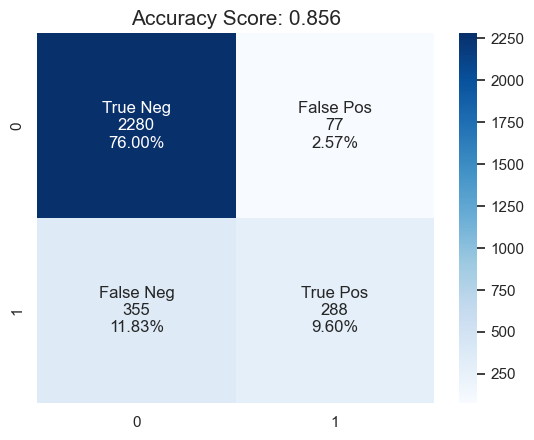

In [60]:
#XGBOOST
from xgboost import XGBClassifier
steps = [('rescale', StandardScaler()),
         ('sgboost', GradientBoostingClassifier())]
xgb_model = Pipeline(steps)
xgb_model.fit(X_train, y_train)

y_train_pred = xgb_model.predict(X_train)
XGBpred = xgb_model.predict(X_test)
print(classification_report(y_test,XGBpred))
cf_matrixLr = confusion_matrix(y_test,XGBpred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrixLr.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrixLr.flatten()/np.sum(cf_matrixLr)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrixLr, annot = labels, fmt = '', cmap = 'Blues')
all_sample_title = 'Accuracy Score: {0}'.format(xgb_model.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

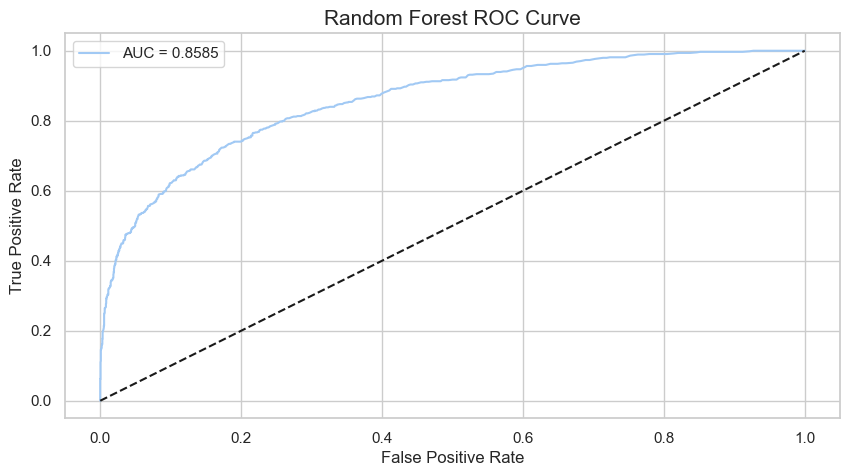

In [61]:
plt.figure(figsize=(10,5))
y_pred_proba = modelRf.predict_proba(X_test)[:][:,1]
df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve', size = 15)
plt.legend()

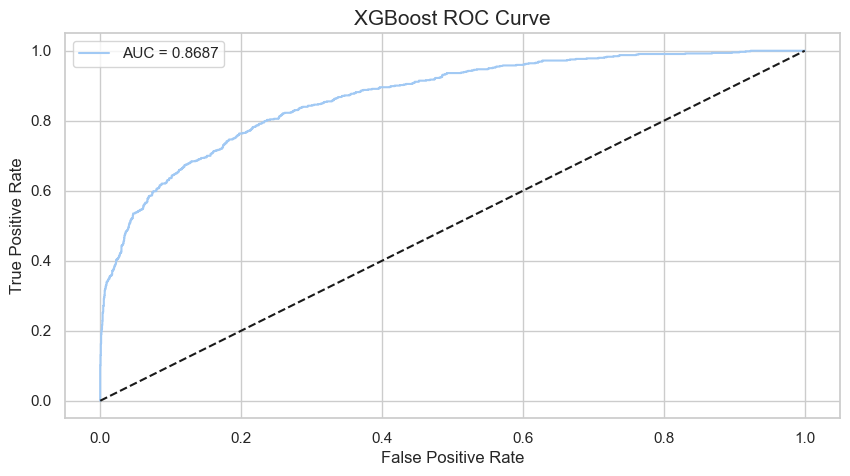

In [62]:
plt.figure(figsize=(10,5))
y_pred_proba = xgb_model.predict_proba(X_test)[:][:,1]
df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve', size = 15)
plt.legend()

In [66]:
from lazypredict.Supervised import LazyClassifier
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric = recall_score,classifiers = 'all',random_state=42,predictions = True)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:26<00:00,  1.10it/s]


In [67]:
models.sort_values('ROC AUC',ascending=False)

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,recall_score,Time Taken
Model,,,,,,
LGBMClassifier,0.85,0.72,0.72,0.84,0.48,0.48
RandomForestClassifier,0.86,0.71,0.71,0.84,0.45,1.63
XGBClassifier,0.85,0.71,0.71,0.83,0.47,1.40
AdaBoostClassifier,0.85,0.70,0.70,0.83,0.44,0.76
BaggingClassifier,0.84,0.70,0.70,0.83,0.44,0.57
NearestCentroid,0.70,0.69,0.69,0.72,0.67,0.07
ExtraTreesClassifier,0.84,0.68,0.68,0.82,0.40,1.79
SVC,0.85,0.67,0.67,0.82,0.37,2.88
DecisionTreeClassifier,0.78,0.67,0.67,0.78,0.47,0.14


In [68]:
predictions

,AdaBoostClassifier,BaggingClassifier,BernoulliNB,CalibratedClassifierCV,DecisionTreeClassifier,DummyClassifier,ExtraTreeClassifier,ExtraTreesClassifier,GaussianNB,KNeighborsClassifier,...,PassiveAggressiveClassifier,Perceptron,QuadraticDiscriminantAnalysis,RandomForestClassifier,RidgeClassifier,RidgeClassifierCV,SGDClassifier,SVC,XGBClassifier,LGBMClassifier
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,1,0,1,1,1,1,...,0,1,1,1,0,0,0,1,1,1
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2997,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
predictions['LGBMClassifier'].to_csv('banking_churn.csv', header=False, index=False)